# **Questions**

4. Which are the top five OECD countries that present the best laboral integration rates according to the educational attainment of the immigrant during 2015-2019?

In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('../data/clean/immigrant_education_employment_OECD.csv')
data

,Country,Place of birth,Educational attainment,Year,Unit,Value
0,Australia,Foreign-born,Total,2015,Percentage,72.3
1,Australia,Foreign-born,Total,2016,Percentage,72.6
2,Australia,Foreign-born,Total,2017,Percentage,73.7
3,Australia,Foreign-born,Total,2018,Percentage,74.5
4,Australia,Foreign-born,Total,2019,Percentage,75.1
...,...,...,...,...,...,...
1188,Lithuania,Native-born,High,2015,Percentage,90.1
1189,Lithuania,Native-born,High,2016,Percentage,91.3
1190,Lithuania,Native-born,High,2017,Percentage,91.1
1191,Lithuania,Native-born,High,2018,Percentage,91.5


General overview of the laboral integration rates according to the educational attainment of the Whole population (MEAN)

In [18]:
max_immi = data.pivot_table(index=['Educational attainment', 'Year', 'Unit'], aggfunc = {'Value':'mean'} )

max_immi

Value
Educational attainment Year Unit                 
High                   2015 Percentage  81.106452
                       2016 Percentage  81.895000
                       2017 Percentage  82.686667
                       2018 Percentage  83.279310
                       2019 Percentage  83.625862
Low                    2015 Percentage  55.220339
                       2016 Percentage  57.218966
                       2017 Percentage  58.139655
                       2018 Percentage  58.350000
                       2019 Percentage  58.828571
Medium                 2015 Percentage  71.979032
                       2016 Percentage  73.371667
                       2017 Percentage  74.381667
                       2018 Percentage  75.082759
                       2019 Percentage  75.681034
Total                  2015 Percentage  71.654545
                       2016 Percentage  73.375806
                       2017 Percentage  74.329032
                       2018 Percentage  75.141667
                       2019 Percentage  75.941667

Detailed examination of the Employment Rate by Country, place of birth and Educational attainment

In [19]:
def emp_rate_edu (data: pd.DataFrame, place_of_birth: object, Educational_attainment : object,  year: int= 2019)-> pd.DataFrame:

    """"
    This function inputs a data frame, a year from 2015 until 2019, and Educational_attainment = 'Low', 'Medium', 'High'. 
    Depending on the place_of_birth('Native-born', 'Foreign-born'), Educational_attainment and the year selected the function returns a data frame 
    including the columns = 'Country', 'Educational_attainment', 'Year', 'Unit' always showing the value Percentage in every row, and 'Value' corresponding to
    every single country included in the data frame called data.

    """

    immi = data.copy().set_index('Place of birth')
    immi = immi.loc[[place_of_birth]]
    immi = immi[(immi['Educational attainment'] == Educational_attainment) & (immi['Year'] == year)]

    max_immi1 = immi.pivot_table(index=['Country', 'Educational attainment', 'Year'], aggfunc = {'sum'} )

            

    max_immi2 = max_immi1.sort_values(by = ('Value', 'sum'), ascending=False).head(7)
    
   
    return max_immi2

In [20]:
data_1 = emp_rate_edu(data, 'Foreign-born',  'High', 2019)
data_1

,,,Unit,Value
,,,sum,sum
Country,Educational attainment,Year,,
Iceland,High,2019,Percentage,89.8
Hungary,High,2019,Percentage,87.2
Israel,High,2019,Percentage,85.5
Luxembourg,High,2019,Percentage,84.7
Switzerland,High,2019,Percentage,84.3
Norway,High,2019,Percentage,84.2
Lithuania,High,2019,Percentage,83.7


In [21]:
data_1.columns = data_1.columns.droplevel(1)

In [22]:
data_2 = emp_rate_edu(data, 'Foreign-born', 'Medium', 2019)
data_2

,,,Unit,Value
,,,sum,sum
Country,Educational attainment,Year,,
Slovak Republic,Medium,2019,Percentage,82.8
Czech Republic,Medium,2019,Percentage,82.4
Hungary,Medium,2019,Percentage,81.6
Iceland,Medium,2019,Percentage,81.5
Portugal,Medium,2019,Percentage,80.3
United Kingdom,Medium,2019,Percentage,80.0
Germany,Medium,2019,Percentage,79.1


In [23]:
data_2.columns = data_2.columns.droplevel(1)

In [24]:
data_3 = emp_rate_edu(data, 'Foreign-born', 'Low', 2019)
data_3

,,,Unit,Value
,,,sum,sum
Country,Educational attainment,Year,,
Portugal,Low,2019,Percentage,78.1
Iceland,Low,2019,Percentage,76.3
Hungary,Low,2019,Percentage,75.4
Switzerland,Low,2019,Percentage,71.7
Mexico,Low,2019,Percentage,70.1
United States,Low,2019,Percentage,67.1
United Kingdom,Low,2019,Percentage,66.3


In [25]:
data_3.columns = data_3.columns.droplevel(1)
data_3

,,,Unit,Value
Country,Educational attainment,Year,,
Portugal,Low,2019,Percentage,78.1
Iceland,Low,2019,Percentage,76.3
Hungary,Low,2019,Percentage,75.4
Switzerland,Low,2019,Percentage,71.7
Mexico,Low,2019,Percentage,70.1
United States,Low,2019,Percentage,67.1
United Kingdom,Low,2019,Percentage,66.3


In [26]:
dfs = [data_1, data_2, data_3]

result = pd.concat(dfs).reset_index()

result

,Country,Educational attainment,Year,Unit,Value
0,Iceland,High,2019,Percentage,89.8
1,Hungary,High,2019,Percentage,87.2
2,Israel,High,2019,Percentage,85.5
3,Luxembourg,High,2019,Percentage,84.7
4,Switzerland,High,2019,Percentage,84.3
5,Norway,High,2019,Percentage,84.2
6,Lithuania,High,2019,Percentage,83.7
7,Slovak Republic,Medium,2019,Percentage,82.8
8,Czech Republic,Medium,2019,Percentage,82.4
9,Hungary,Medium,2019,Percentage,81.6


In [27]:
result.columns

Index(['Country', 'Educational attainment', 'Year', 'Unit', 'Value'], dtype='object')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

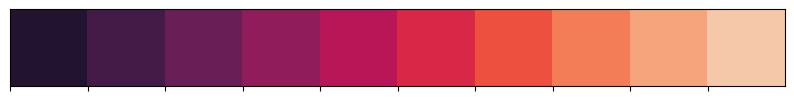

In [30]:
custom_palette = sns.color_palette("rocket", 10)
sns.palplot(custom_palette)

C:\Users\chech\AppData\Local\Temp\ipykernel_30380\3496644408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y= 'Value', data= data_1, palette=custom_palette, ax=ax)
C:\Users\chech\AppData\Local\Temp\ipykernel_30380\3496644408.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x='Country', y= 'Value', data= data_1, palette=custom_palette, ax=ax)


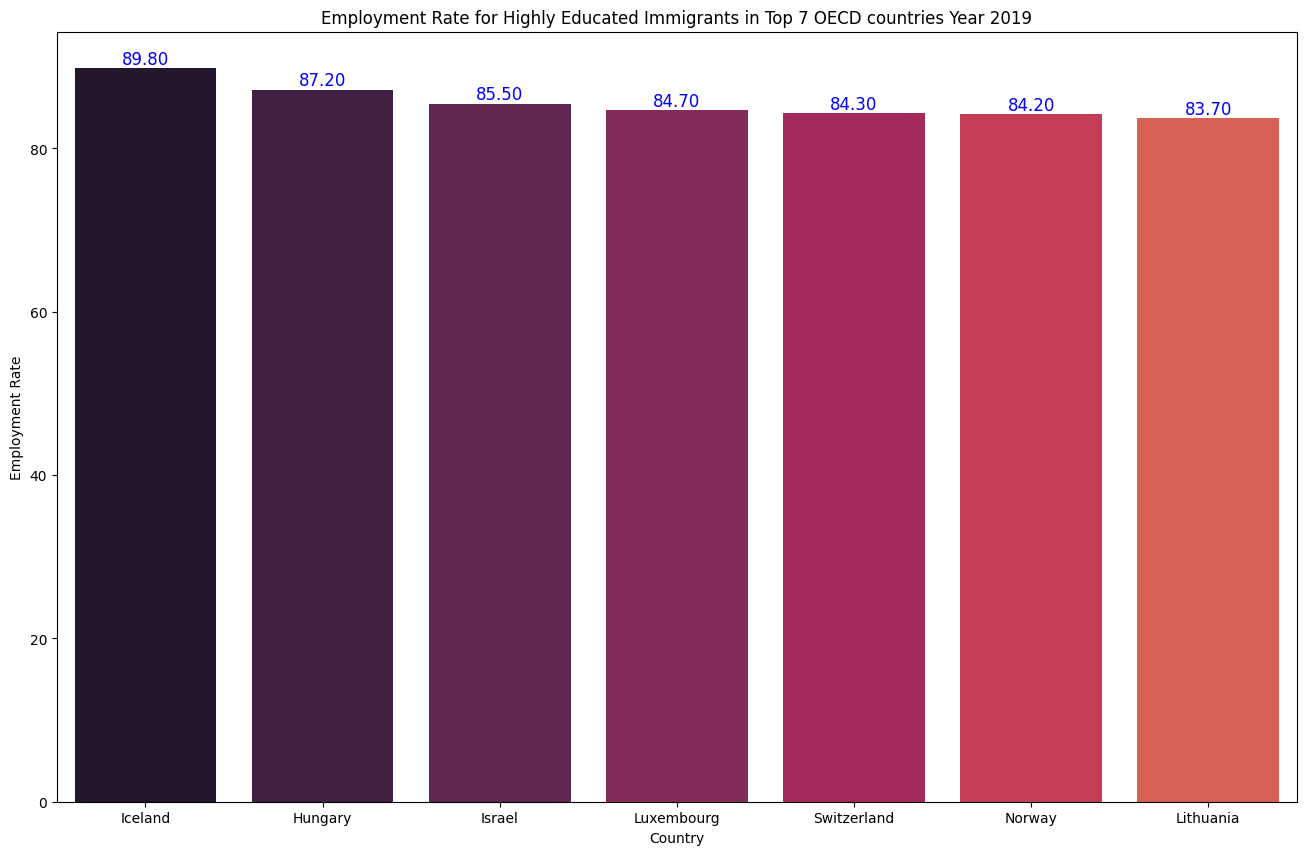

In [31]:
fig, ax = plt.subplots( figsize=(16,10))
sns.barplot(x='Country', y= 'Value', data= data_1, palette=custom_palette, ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Employment Rate")
ax.set_title("Employment Rate for Highly Educated Immigrants in Top 7 OECD countries Year 2019")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')
plt.show()
plt.show()

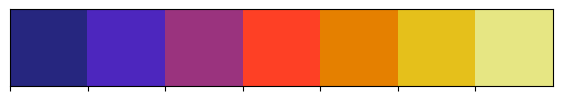

In [32]:
custom_palette_1 = sns.color_palette("CMRmap", 7)
sns.palplot(custom_palette_1)

C:\Users\chech\AppData\Local\Temp\ipykernel_30380\3543730961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y= 'Value', data= data_2, palette=custom_palette_1, ax=ax)


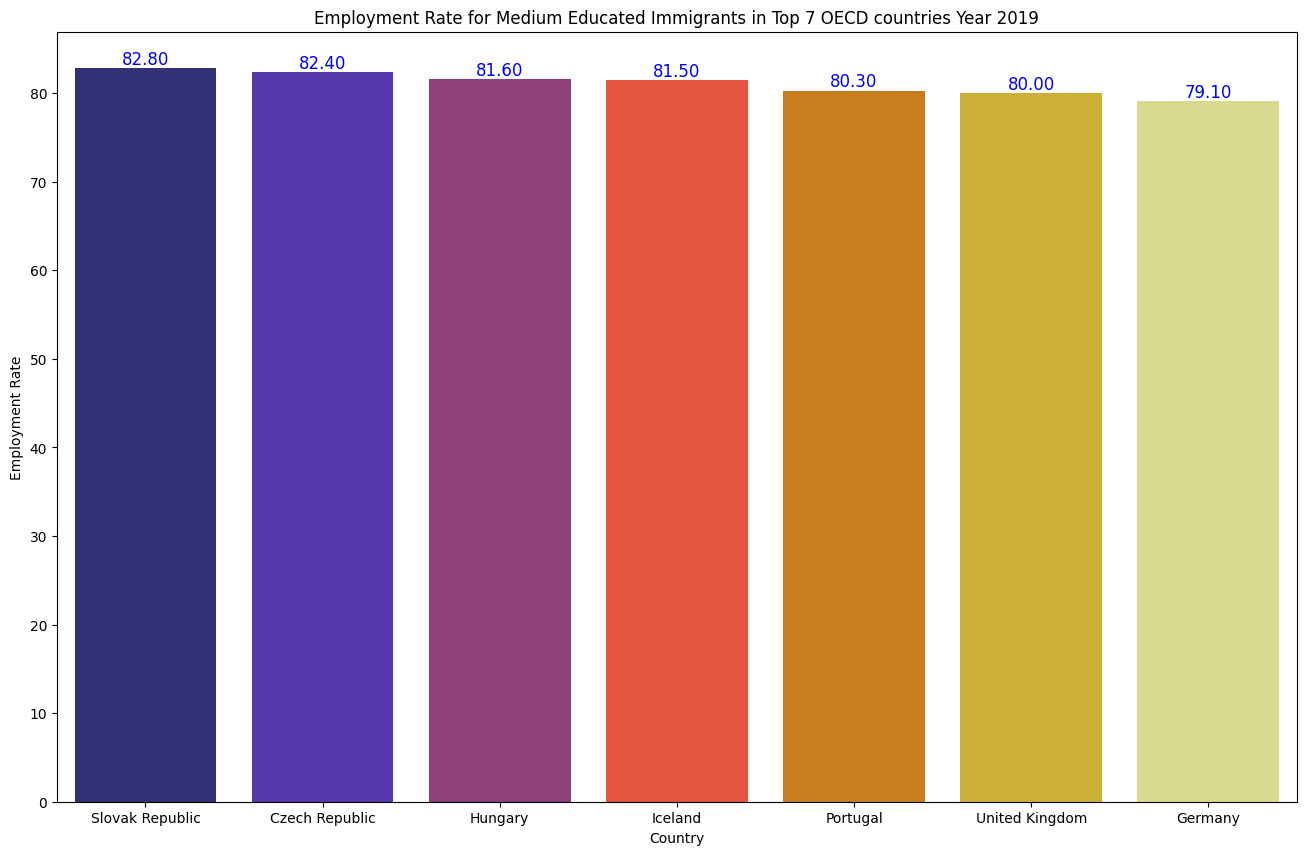

In [36]:
fig, ax = plt.subplots( figsize=(16,10))
sns.barplot(x='Country', y= 'Value', data= data_2, palette=custom_palette_1, ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Employment Rate")
ax.set_title("Employment Rate for Medium Educated Immigrants in Top 7 OECD countries Year 2019")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')
plt.show()
plt.show()

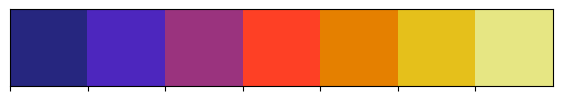

In [35]:
custom_palette_2 = sns.color_palette("Paired", 7)
sns.palplot(custom_palette_1)

C:\Users\chech\AppData\Local\Temp\ipykernel_7192\3306207938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y= 'Value', data= data_3, palette=custom_palette_2, ax=ax)


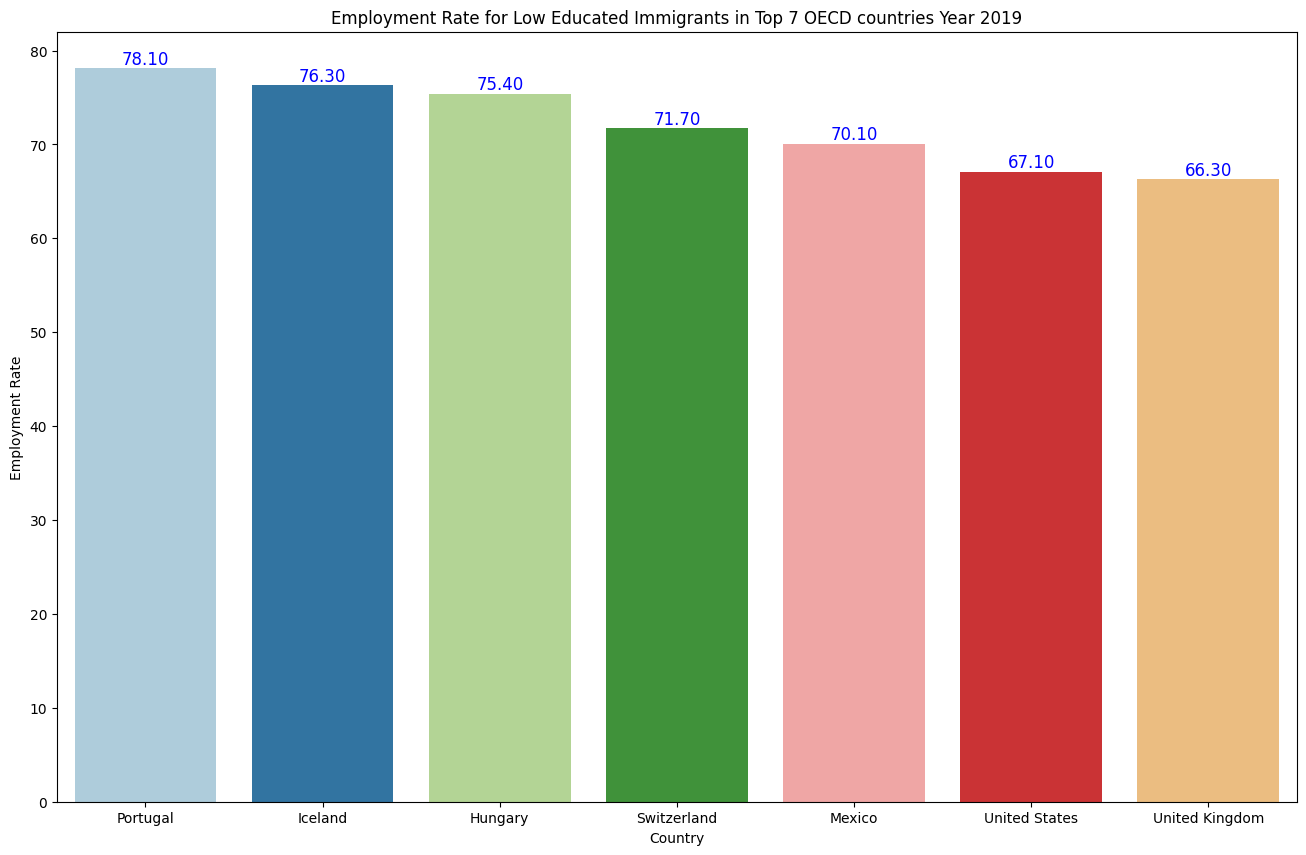

In [ ]:
fig, ax = plt.subplots( figsize=(16,10))
sns.barplot(x='Country', y= 'Value', data= data_3, palette=custom_palette_2, ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Employment Rate")
ax.set_title("Employment Rate for Low Educated Immigrants in Top 7 OECD countries Year 2019")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

plt.show()